In [1]:
import nltk
# from nltk.book import *
from nltk.stem.porter import *
from nltk.stem import * 
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import RegexpTokenizer #regular expression tokenizer
from nltk import FreqDist

import re  # regular expression 

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

import random
import string # to process standard python strings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd

import scipy.sparse
from sklearn.feature_extraction.text import CountVectorizer #for Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer # for Term Frequency Inverse Document Frequency



In [284]:
pwd()

'/Users/paulina/Documents/1.LAU/CSC498_NLP/Python_Code'

In [47]:
#from kaggle.com
dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1'); #https://docs.python.org/3/library/codecs.html#standard-encodings

# encoding is used when the text contains non-English characters such as emojis



In [5]:
dataset.head()

,Col1,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [49]:
sms=[]
sms = dataset[['sms']]  # pick 'sms' from the table. Should be done to all s
sms


,sms
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ã_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [50]:
sms

,sms
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ã_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


### Preprocessing the data

In [53]:
import re
 #sms = re.sub('[^A-Za-z]', '', str(sms))  #if working with 1 sms only instead of entire column

for w in sms.index:
     print(sms['sms'][w])
    

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Ã¥Â£1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea Ã¥Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R 

Also remember to get dobby's bowl from your car
Filthy stories and GIRLS waiting for your
Sorry i now then c ur msg... Yar lor so poor thing... But only 4 one night... Tmr u'll have a brand new room 2 sleep in...
Love isn't a decision, it's a feeling. If we could decide who to love, then, life would be much simpler, but then less magical
Welp apparently he retired
My sort code is  and acc no is . The bank is natwest. Can you reply to confirm i've sent this to the right person!
Where @
U sure u can't take any sick time?
URGENT! We are trying to contact U. Todays draw shows that you have won a Ã¥Â£800 prize GUARANTEED. Call 09050001808 from land line. Claim M95. Valid12hrs only
Watching cartoon, listening music &amp; at eve had to go temple &amp; church.. What about u?
Yo chad which gymnastics class do you wanna take? The site says Christians class is full..
Are you this much buzy
Or better still can you catch her and let ask her if she can sell  &lt;#&gt;  for me.
I am not sure about ni

Where can download clear movies. Dvd copies.
Yep, by the pretty sculpture
Convey my regards to him
Me too watching surya movie only. . .after 6 pm vijay movie POKKIRI
You tell what happen dont behave like this to me. Ok no need to say
Can u get pic msgs to your phone?
Send to someone else :-)
Wat makes some people dearer is not just de happiness dat u feel when u meet them but de pain u feel when u miss dem!!!
For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that m

I love you. You set my soul on fire. It is not just a spark. But it is a flame. A big rawring flame. XoXo
Somewhr someone is surely made 4 u. And God has decided a perfect time to make u meet dat person. . . . till den, . . . . . Enjoy ur crushes..!!!;-)
That's my honeymoon outfit. :)
Will it help if we propose going back again tomorrow
PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08719899230 Identifier Code: 41685 Expires 07/11/04
Never blame a day in ur life. Good days give u happiness. Bad days give u experience. Both are essential in life! All are Gods blessings! good morning.:
Pls confirm the time to collect the cheque.
As a Registered Subscriber yr draw 4 a Ã¥Â£100 gift voucher will b entered on receipt of a correct ans. When are the next olympics. Txt ans to 80062
URGENT! Your Mobile number has been awarded with a Ã¥Â£2000 prize GUARANTEED. Call 09061790121 from land line. Claim 3030. Valid 12hrs only 150ppm
Daddy will take good care of yo

If i let you do this, i want you in the house by 8am.
Best line said in Love: . \I will wait till the day I can forget u Or The day u realize that u cannot forget me.\"... Gn"
I will reach before ten morning
Your pussy is perfect!
Sorry, I'll call later
Someone has contacted our dating service and entered your phone becausethey fancy you! To find out who it is call from a landline 09058098002. PoBox1, W14RG 150p
No message..no responce..what happend?
Also where's the piece
wiskey Brandy Rum Gin Beer Vodka Scotch Shampain Wine \KUDI\"yarasu dhina vaazhthukkal. .."
Boo. How's things? I'm back at home and a little bored already :-(
First has she gained more than  &lt;#&gt; kg since she took in. Second has she done the blood sugar tests. If she has and its ok and her blood pressure is within normal limits then no worries
PICK UR FONE UP NOW U DUMB?
Thanks da thangam, i feel very very happy dear. I also miss you da.
Okey doke. I'm at home, but not dressed cos laying around ill! Speak to you

Still in customer place
How come it takes so little time for a child who is afraid of the dark to become a teenager who wants to stay out all night?
Dude u knw also telugu..thts gud..k, gud nyt..
We confirm eating at esplanade?
Send me your id and password
Kind of. Took it to garage. Centre part of exhaust needs replacing. Part ordered n taking it to be fixed tomo morning.
For ur chance to win a Ã¥Â£250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk.
Well I might not come then...
Long after I quit. I get on only like 5 minutes a day as it is.
Then its most likely called Mittelschmertz. Google it. If you dont have paracetamol dont worry it will go.
Well at this right I'm gonna have to get up and check today's steam sales/pee so text me when you want me to come get you
Just arrived, see you in a couple days &lt;3
K, wat s tht incident?
Yeah get the unlimited
cThen i thk shd b enuff.. Still got conclusion n contents pg n references.. I'll b 

This is the 2nd time we have tried to contact u. U have won the Ã¥Â£1450 prize to claim just call 09053750005 b4 310303. T&Cs/stop SMS 08718725756. 140ppm
TODAY is Sorry day.! If ever i was angry with you, if ever i misbehaved or hurt you? plz plz JUST SLAP URSELF Bcoz, Its ur fault, I'm basically GOOD
Cheers for the card ... Is it that time of year already?
HOT LIVE FANTASIES call now 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870..k
When people see my msgs, They think Iam addicted to msging... They are wrong, Bcoz They don\'t know that Iam addicted to my sweet Friends..!! BSLVYL
Ugh hopefully the asus ppl dont randomly do a reformat.
Haven't seen my facebook, huh? Lol!
Mah b, I'll pick it up tomorrow
Still otside le..u come 2morrow maga..
Do u still have plumbers tape and a wrench we could borrow?
Dear Voucher Holder, To claim this weeks offer, at you PC please go to http://www.e-tlp.co.uk/reward. Ts&Cs apply.
It vl bcum more difficult..
UR GOING 2 BAHAMAS! Ca

I'm thinking that chennai forgot to come for auction..
Then Ã_ come n pick me at 530 ar?
Early bird! Any purchases yet?
Went to pay rent. So i had to go to the bank to authorise the payment.
Erm â°Ã_ ill pick you up at about 6.45pm. That'll give enough time to get there, park and that.
HEY MATE! HOWS U HONEY?DID U AVE GOOD HOLIDAY? GIMMI DE GOSS!x
Howz pain.it will come down today.do as i said ystrday.ice and medicine.
chile, please! It's only a  &lt;DECIMAL&gt;  hour drive for me. I come down all the time and will be subletting feb-april for audition season.
Yes ammae....life takes lot of turns you can only sit and try to hold the steering...
Yeah that's what I thought, lemme know if anything's goin on later
Mmmm.... I cant wait to lick it!
Pls go there today  &lt;#&gt; . I dont want any excuses
Fantasy Football is back on your TV. Go to Sky Gamestar on Sky Active and play Ã¥Â£250k Dream Team. Scoring starts on Saturday, so register now!SKY OPT OUT to 88088
Can you plz tell me the 

Hi baby ive just got back from work and i was wanting to see u allday! I hope i didnt piss u off on the phone today. If u are up give me a call xxx
FreeMsg Today's the day if you are ready! I'm horny & live in your town. I love sex fun & games! Netcollex Ltd 08700621170150p per msg reply Stop to end
Is it your yahoo boys that bring in the perf? Or legal.
No need to say anything to me. I know i am an outsider
have you ever had one foot before?
Just got to  &lt;#&gt;
Good! No, donâ°ÃÃ·t need any receiptsâ°ÃÃwell done! (â°Ã_) Yes, please tell . Whatâ°ÃÃ·s her number, i could ring her
Ever green quote ever told by Jerry in cartoon \A Person Who Irritates u Always Is the one Who Loves u Vry Much But Fails to Express It...!..!! :-) :-) gud nyt"
Leave it wif me lar... ÃÃ wan to carry meh so heavy... Is da num 98321561 familiar to Ã_?
Beautiful truth : Expression of the face could Be seen by everyone... But the depression of heart Could be understood only By the Loved ones.. Gud Ni

Dont think you need yellow card for uk travel. Ask someone that has gone before. If you do its just  &lt;#&gt; bucks
Can u look 4 me in da lib i got stuff havent finish yet.
Sounds great! Im going to sleep now. Have a good night!
Don't b floppy... b snappy & happy! Only gay chat service with photo upload call 08718730666 (10p/min). 2 stop our texts call 08712460324
House-Maid is the murderer, coz the man was murdered on  &lt;#&gt; th January.. As public holiday all govt.instituitions are closed,including post office..understand?
How come u got nothing to do?
Nothing will ever be easy. But don't be looking for a reason not to take a risk on life and love
i want to grasp your pretty booty :)
I've got it down to a tea. not sure which flavour
I'm going 2 orchard now laready me reaching soon. U reaching?
Dear i am not denying your words please
You know my old Dom I told you about yesterday ? His name is Roger? He got in touch with me last night and wants me to meet him today at 2 pm
COME BA

Anytime...
Mmmmmmm *snuggles into you* ...*deep contented sigh* ... *whispers* ... I fucking love you so much I can barely stand it ...
Yar but they say got some error.
Hey anyway i have to :-)
Wow so healthy. Old airport rd lor. Cant thk of anything else. But i'll b bathing my dog later.
Wif my family booking tour package.
Did you say bold, then torch later. Or one torch and 2bold?
Haha awesome, I might need to take you up on that, what you doin tonight?
Ya i knw u vl giv..its ok thanks kano..anyway enjoy wit ur family wit 1st salary..:-);-)
Huh so slow i tot u reach long ago liao... U 2 more days only i 4 more leh...
Thats cool princess! I will cover your face in hot sticky cum :)
Big brotherâ°ÃÃ·s really scraped the barrel with this shower of social misfits
Oops i thk i dun haf enuff... I go check then tell Ã_..
S:)8 min to go for lunch:)
Hey. What happened? U switch off ur cell d whole day. This isnt good. Now if u do care, give me a call tomorrow.
K will do, addie &amp; I are d

It's cool, we can last a little while. Getting more any time soon?
:-( sad puppy noise
Yes its possible but dint try. Pls dont tell to any one k
Anyway holla at me whenever you're around because I need an excuse to go creep on people in sarasota
Where you. What happen
I was gonna ask you lol but i think its at 7
Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send GO to 86688 only 150p/meg. CC: 08718720201 HG/Suite342/2lands Row/W1j6HL
PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S.I.M. points. Call 08715203685 Identifier Code:4xx26 Expires 13/10/04
Go chase after her and run her over while she's crossing the street
I'd like to tell you my deepest darkest fantasies. Call me 09094646631 just 60p/min. To stop texts call 08712460324 (nat rate)
Is there coming friday is leave for pongal?do you get any news from your work place.
Hey... Very inconvenient for your sis a not huh?
Ok i vl..do u know i got adsense approved..
* Was really good to see you the

Yup he msg me: is tat yijue? Then i tot it's my group mate cos we meeting today mah... I'm askin if Ã_ leaving earlier or wat mah cos mayb Ã_ haf to walk v far...
... Are you in the pub?
There is a first time for everything :)
Daddy, shu shu is looking 4 u... U wan me 2 tell him u're not in singapore or wat?
I ask if u meeting da ge tmr nite...
Gr8. So how do you handle the victoria island traffic. Plus when's the album due
Nite nite pocay wocay luv u more than n e thing 4eva I promise ring u 2morrowxxxx
East coast
You should get more chicken broth if you want ramen unless there's some I don't know about
My slave! I want you to take 2 or 3 pictures of yourself today in bright light on your cell phone! Bright light!
Nope. I just forgot. Will show next week
So how are you really. What are you up to. How's the masters. And so on.
I'm at bruce &amp; fowler now but I'm in my mom's car so I can't park (long story)
I dont know oh. Hopefully this month.
Hi elaine, is today's meeting confirme

In [55]:
# DataFrame method replace 

sms = sms.replace(regex={r'[^A-Za-z]': ' '})

In [56]:
sms = sms['sms'].str.lower()
sms

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in   a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the  nd time we have tried   contact u...
5568               will     b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: sms, Length: 5572, dtype: object

## Tokenizing and removing stop words

In [64]:
# Remove stopwords
nltk.download('punkt') # punkt dataset required to train tokenizers in nltk 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Bayd-
[nltk_data]     Brisht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Bayd-
[nltk_data]     Brisht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:

# sms[0]

# for w in sms.index:
#     print(sms[w])

tok_sms = []

for w in sms.index:
    tok_sms.append(word_tokenize(sms[w]))

In [66]:
for word in tok_sms:
    if word in stopwords.words('english'):
        tok_sms.remove(word)

## Stemming with PorterStemmer

In [71]:
stemmer = PorterStemmer()
type(tok_sms)

# for i in range(len(tok_sms)):
#     tok_sms[i] = stemmer.stem(tok_sms[i])
    
stem_sms = []
for sentence in tok_sms:
    stem_sms.append(" ".join([stemmer.stem(i) for i in sentence]))


In [68]:
stem_sms

['go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat',
 'ok lar joke wif u oni',
 'free entri in a wkli comp to win fa cup final tkt st may text fa to to receiv entri question std txt rate t c s appli over s',
 'u dun say so earli hor u c alreadi then say',
 'nah i don t think he goe to usf he live around here though',
 'freemsg hey there darl it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chg to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'as per your request mell mell oru minnaminungint nurungu vettam ha been set as your callertun for all caller press to copi your friend callertun',
 'winner as a valu network custom you have been select to receivea prize reward to claim call claim code kl valid hour onli',
 'had your mobil month or more u r entitl to updat to the latest colour mobil with camera for free call the mobil updat co free on',
 'i m gon 

In [70]:

from autocorrect import Speller
check = Speller(lang='en')
stem_sms[i] = stemmer.stem(check(stem_sms[i]))


NameError: name 'i' is not defined

## Create the text from tok_sms

In [72]:
sms_text = " ".join(stem_sms)
sms_text

'go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat ok lar joke wif u oni free entri in a wkli comp to win fa cup final tkt st may text fa to to receiv entri question std txt rate t c s appli over s u dun say so earli hor u c alreadi then say nah i don t think he goe to usf he live around here though freemsg hey there darl it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chg to send to rcv even my brother is not like to speak with me they treat me like aid patent as per your request mell mell oru minnaminungint nurungu vettam ha been set as your callertun for all caller press to copi your friend callertun winner as a valu network custom you have been select to receivea prize reward to claim call claim code kl valid hour onli had your mobil month or more u r entitl to updat to the latest colour mobil with camera for free call the mobil updat co free on i m gon na be home soon and i don t want to talk 

## Create ML model

### Using bag-of-words approach

In [73]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer

matrix = CountVectorizer(max_features=1000, ngram_range=(3,3))
X = matrix.fit_transform(stem_sms).toarray()
feats = matrix.get_feature_names()

In [74]:
X_frame = pd.DataFrame(X, columns=feats)
X_frame[15:55]

,account statement for,across the sea,admir who is,after lunch she,afternoon my love,all caller press,all the best,all will be,am go to,am late for,...,your costa del,your friend callertun,your lucki day,your mobil mth,your mobil no,your mobil number,your mobil will,your repli to,your rington order,your tone not
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y = dataset.iloc[:, 0]

# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [78]:
len(X_test)

1393

In [79]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train) # training the classifier on the training set

# Predict Class
y_pred = classifier.predict(X_test) # testing the classifier on the unlabeled testing set

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9612347451543432

## Using bigrams or trigrams over unigrams

In [86]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer

matrix = CountVectorizer(max_features=1000, ngram_range = (1,1))

X = matrix.fit_transform(stem_sms).toarray()

In [87]:
y = dataset.iloc[:, 0]

# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [314]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7903804737975593

In [371]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(
        y_test, y_pred, labels = ['spam', 'ham'])

conf_mat

array([[ 122,   66],
       [   6, 1199]])

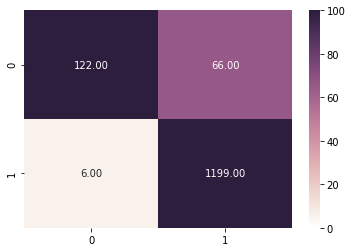

In [372]:
import seaborn as sn

cmap = sn.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(conf_mat, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
